Diabetes detection using machine learning -> Logistic Regression,Support Vector Machine

In [1]:
import numpy as np                                                 #important library to be used
import pandas as pd                       
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
dataframe=pd.read_csv('https://raw.githubusercontent.com/ankurdizital/ml/master/diabetes.csv')  #reading  Dataset and saving in pandas dataframe
dataframe.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
feature=dataframe.drop('Outcome',axis=1)                            #Selecting all columns excluding Outcome

In [5]:
target=dataframe['Outcome']
target                                                              #Target is Outcome column

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [6]:
feature.head(5)                                                                     #feature 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


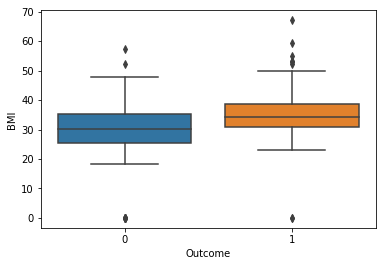

In [7]:
sns.boxplot(target,feature['BMI'])             ##BMI ,higher BMI for diabetic

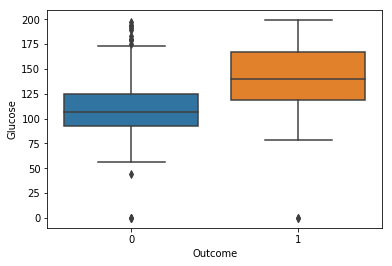

In [8]:
sns.boxplot(target,feature['Glucose'])                      ##Glucose ,higher Glucose for diabetic

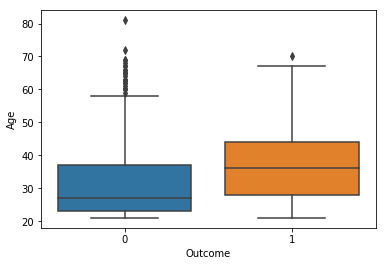

In [9]:
sns.boxplot(target,feature['Age'])                      #Age 40-50 are more likely to be diabetic

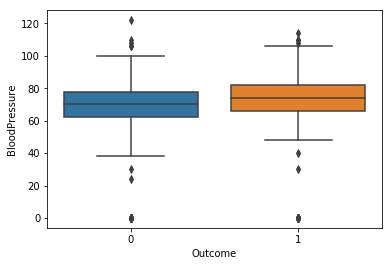

In [10]:
sns.boxplot(target,feature['BloodPressure'])              #No clear classification based on BP

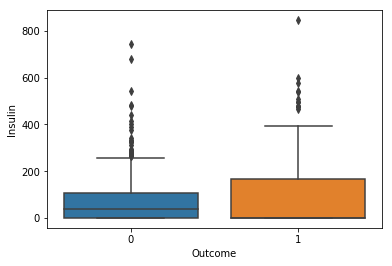

In [11]:
sns.boxplot(target,feature['Insulin'])

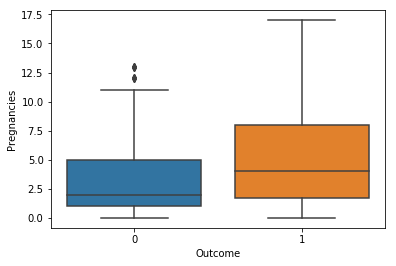

In [12]:
sns.boxplot(target,feature['Pregnancies'])             #More than 5 Pregnancies  are more likely to be diabetic

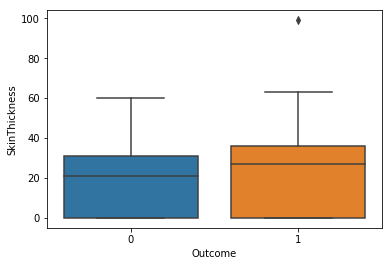

In [13]:
sns.boxplot(target,feature['SkinThickness'])

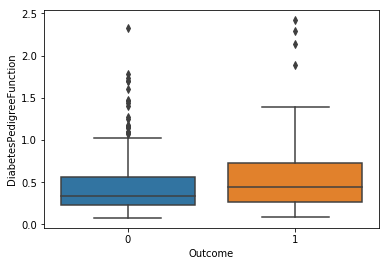

In [14]:
sns.boxplot(target,feature['DiabetesPedigreeFunction'])   # More than 0.5 DPF is supporing for diabetes

## Preprocessing data

In [15]:
feature_array=feature.iloc[:].values
target_array=target.values.reshape(-1,1)
feature_array.shape,target_array.shape

((768, 8), (768, 1))

In [16]:
from sklearn.model_selection import train_test_split                                          #splitting the data test=24%
x_train,x_test,y_train,y_test=train_test_split(feature_array,target_array,test_size=0.24)     # training=76%                  

In [29]:
from sklearn.linear_model import LogisticRegression                   #importing Logistic Regression class

In [30]:
LR_first=LogisticRegression()                                        #initializing  LogisticRegression class

In [31]:
LR_first

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
LR_first.fit(x_train,y_train)

c:\users\ankur\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ankur\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
prediction=LR_first.predict(x_test)

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score    #importing functions confusion M,accuracy,recall

In [54]:
TN,FP,FN,TP=confusion_matrix(y_test,prediction).ravel()
print('TN=%d \nFP=%d \nFN=%d \nTP=%d'%(TN,FP,FN,TP))

TN=104 
FP=15 
FN=31 
TP=35


In [58]:
accuracy=accuracy_score(y_test,prediction)  
accuracy
#(104+35)/(109+31+7+38)

0.7513513513513513

In [59]:
recall_score(y_test,prediction)
#35/(35+31)

0.5303030303030303

In [60]:
dataframe.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [61]:
LR_first.predict(feature[0:9])

array([1, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [62]:
target[0:9]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
Name: Outcome, dtype: int64

In [63]:
x=np.array([[0,125,72,35,0,33.6,0.6,30]])               ## making prediction by user input

In [64]:
LR_first.predict(x)

array([0], dtype=int64)

## After selecting  Glucose,BloodPressure,BMI,Age

In [65]:
Dataframe_New=pd.DataFrame({'Glucose':dataframe.Glucose,'BloodPressure':dataframe.BloodPressure,'BMI':dataframe.BMI,'Age':dataframe.Age})

In [66]:
Dataframe_New

,Glucose,BloodPressure,BMI,Age
0,148,72,33.6,50
1,85,66,26.6,31
2,183,64,23.3,32
3,89,66,28.1,21
4,137,40,43.1,33
...,...,...,...,...
763,101,76,32.9,63
764,122,70,36.8,27
765,121,72,26.2,30
766,126,60,30.1,47


In [72]:
feature_array=Dataframe_New.iloc[:].values
target_array=target.values.reshape(-1,1)

In [123]:
x1_train,x1_test,y1_train,y1_test=train_test_split(feature_array,target_array,test_size=0.24,random_state=1)

In [124]:
x1_train.shape,y1_train.shape

((583, 4), (583, 1))

In [125]:
LR_second=LogisticRegression(random_state=5)

In [126]:
LR_second.fit(x1_train,y1_train)

c:\users\ankur\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\ankur\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=5, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [127]:
LR_sec_prediction=LR_second.predict(x1_test)

In [137]:
TN,FP,FN,TP=confusion_matrix(y1_test,LR_sec_prediction).ravel()
print('TN=%d \nFP=%d \nFN=%d \nTP=%d'%(TN,FP,FN,TP))

TN=108 
FP=9 
FN=31 
TP=37


In [138]:
accuracy_score(y1_test,LR_sec_prediction)

0.7837837837837838

In [139]:
recall_score(y1_test,LR_sec_prediction)

0.5441176470588235

## USING SVM

In [147]:
from sklearn.svm import LinearSVC

In [148]:
svm_clf=LinearSVC()

In [149]:
svm_clf.fit(x1_train,y1_train)

c:\users\ankur\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\ankur\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [150]:
svf_predict=svm_clf.predict(x1_test)

In [151]:
accuracy_score(y1_test,svf_predict)

0.41621621621621624

In [152]:
recall_score(y1_test,svf_predict)

0.9705882352941176

In [153]:
TN,FP,FN,TP=confusion_matrix(y1_test,svf_predict).ravel()
print('TN=%d \nFP=%d \nFN=%d \nTP=%d'%(TN,FP,FN,TP))

TN=11 
FP=106 
FN=2 
TP=66


In [160]:
svm_clf.predict([[100,98,11.8,28]])

array([1], dtype=int64)

In [167]:
LR_second.predict([[125,98,11.8,28]])

array([0], dtype=int64)